# Aviation Accidents Analysis

## Overview

This project analyzes data of aviation accidents to recommend the best aircrafts for a business to invest in.

## Business Problem

Your company has decided to expand the industries to diversify its portfolio and has chosen aviation to invest in. They are interested in finding aircrafts for private and commercial enterprises. However, they do not know the potential risks that come with each aircraft make, so it's your job to determine the potential risks that may arise on investment. Finally, analyze them to yield three actionable recommendations for the head of their Aviation team to make.


In [1]:
# import python packages for analyis, computation and visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading in the data with pd.read_csv
Aviation_data = pd.read_csv('topten_real_final.csv', low_memory=False, encoding='latin-1')
USState_Codes = pd.read_csv('archive/USState_Codes.csv', low_memory=False, encoding='latin-1')

In [3]:
# Summarize data frame info
Aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              9607 non-null   int64  
 1   Event.Id                9607 non-null   object 
 2   Investigation.Type      9607 non-null   object 
 3   Event.Date              9607 non-null   int64  
 4   Location                9607 non-null   object 
 5   Country                 9607 non-null   object 
 6   Injury.Severity         9607 non-null   object 
 7   Aircraft.damage         9607 non-null   object 
 8   Aircraft.Category       9607 non-null   object 
 9   Make                    9607 non-null   object 
 10  Model                   9607 non-null   object 
 11  Number.of.Engines       9607 non-null   float64
 12  Air.carrier             5400 non-null   object 
 13  Total.Fatal.Injuries    9607 non-null   float64
 14  Total.Serious.Injuries  9607 non-null   

In [4]:
# Summarize data frame statistics
Aviation_data.describe()

,Unnamed: 0,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000,9607.000000
mean,74736.649110,2013.729989,1.129652,0.269907,0.300198,0.143333,4.054231
std,6510.109544,3.905393,0.345776,0.784846,2.270722,0.696174,22.769401
min,63915.000000,2008.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,69149.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,74495.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,80029.500000,2017.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,88661.000000,2022.000000,4.000000,11.000000,137.000000,50.000000,394.000000


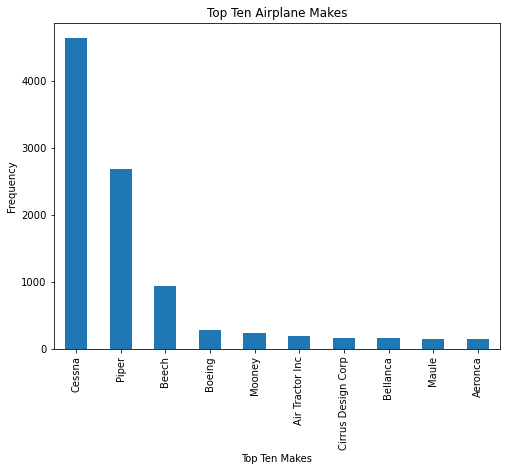

In [5]:
# plot top ten to show - might use this in analysis
fig, ax = plt.subplots(figsize=(8,6))
top_ten_makes = Aviation_data.Make.value_counts()
top_ten_makes.plot.bar()

ax.set_title('Top Ten Airplane Makes')
ax.set_xlabel('Top Ten Makes')
ax.set_ylabel('Frequency')

plt.savefig('Top Ten Airplane Makes')
plt.show();

In [6]:
top_ten_makes 

Cessna                4638
Piper                 2691
Beech                  935
Boeing                 291
Mooney                 238
Air Tractor Inc        192
Cirrus Design Corp     169
Bellanca               159
Maule                  150
Aeronca                144
Name: Make, dtype: int64

## Data Understanding

The data includes information from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. This information will be useful for finding the best aircraft models to invest in based on previous accidents.

The Avaiation dataframe includes 18 columns. For each incident it covers 18 categories, including but not limited to the investigation type, make and model of the plane, weather and location data, information about the flight, and damage to the plane and injuries to passengers. In the US State Codes dataframe there are two columns, one with the state names and their corresponding code in the neighboring cell. There is no missing data and there are only object data types. This information will be analyzed to create visualizations which will subsequently aid in the final recommendations.



## Data Analysis
This analysis centers on aviation accidents within the United States and international waters, and is conducted with the aim of providing valuable insights to your company’s stakeholders. The ultimate objective is to provide recommendations about which aircraft models would be most profitable, with the least potential risk on investing.

## Accident versus Incident

If an event appears in this dataset it means something went wrong, but what? There are two types of events, accidents and incidents. An event is defined as an accident when an injury occurs. Incident means an occurrence other than an accident, where something went wrong but did not escalate to an accident due to safety measures. 
Based on the analysis below we will draw conclusions to see which aircraft makes have sufficient safety measures.

In [7]:
# Create pivot table to illustrate count of accident and incident per make
grouped = Aviation_data.pivot_table(index='Make', columns='Investigation.Type', aggfunc='size', fill_value=0)

In [8]:
# Add a new column for the ratio of accidents to total incidents and accidents
grouped['Ratio'] = grouped['Accident'] / (grouped['Accident'] + grouped['Incident'])

In [9]:
grouped 

Investigation.Type,Accident,Incident,Ratio
Make,,,
Aeronca,144,0,1.000000
Air Tractor Inc,191,1,0.994792
Beech,918,17,0.981818
Bellanca,158,1,0.993711
Boeing,212,79,0.728522
Cessna,4580,58,0.987495
Cirrus Design Corp,159,10,0.940828
Maule,150,0,1.000000
Mooney,234,4,0.983193


Table. 

The table is divided by make and has counts for both accidents and incidents. It also contains the ratio of accidents to total events. If the ratio trends towards 1 it has a high frequency of accidents and the closer it is to 0, the lower the frequency of accidents. This highlights the makes that have safety measures in place to avoid an incident escalating to an accident. 

Findings.

There isnt a widespread variation between ratios given the small metric.
Boeing's ratio is the lowest with 0.728522 which brings it out on top with best safety measures in this analysis. Boeing is follwed by Beech and Mooney for second and third and Aeronca and Maule tie for last. According to this table, Boeing, Beech and Mooney have the most efficient safety measures in place.

## Pilots Negligence or Engine Failure

## Risk of Aircraft Damage 

## Risk of Personal Injury